# Visualisation of Pokemon

The goal this week is to look at some more visualisation methods.

We will follow examples from [this Python Seaborn tutorial](https://elitedatascience.com/python-seaborn-tutorial) by EliteDataScience.   [Seaborn](https://seaborn.pydata.org/) is a Python library that sits on top of matplotlib and Pandas and gives us a richer collection of plots than the basic plot method.   Unfortunately (for us), there has just (July 2018) been a new release of Seaborn that is incompatible with the version installed in Anaconda; the official tutorial and documentation refer to the new version so it is a bit hard to find help.  Luckily the tutorial I've linked above is a pretty good walk through of the major plot styles so should be useful.  You can find documentation and examples of the older version of Seaborn via the [archive](https://seaborn.pydata.org/archive.html).  Check your Seaborn version below.

I've downloaded the Pokemon dataset from the tutorial and included it in this repository.   I had to edit the file a little since it had some unicode characters in that blocked the load.  The first few cells here import this file.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# see what version of Seaborn you have installed so you can find the right documentation
sns.__version__

'0.11.1'

In [3]:
# Read dataset
df = pd.read_csv('files/Pokemon.csv', index_col=0)

In [4]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


Now step through the examples in the tutorial to learn a little about the plot methods available in Seaborn.  

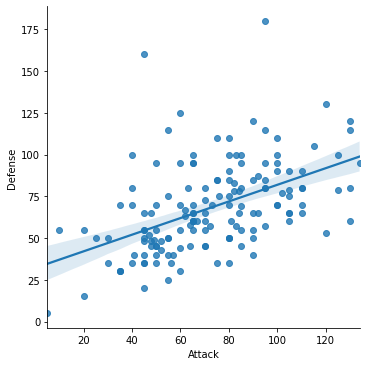

In [6]:
sns.lmplot(x='Attack', y='Defense', data=df)

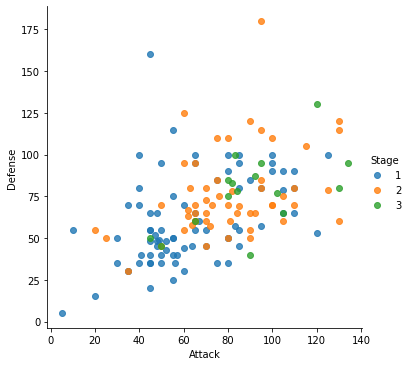

In [7]:
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, # No regression line
           hue='Stage')   # Color by evolution stage

(0.0, 140.45)

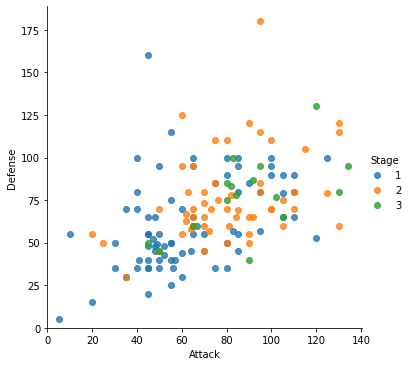

In [8]:
# Plot using Seaborn
sns.lmplot(x='Attack', y='Defense', data=df,
           fit_reg=False, 
           hue='Stage')
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

<AxesSubplot:>

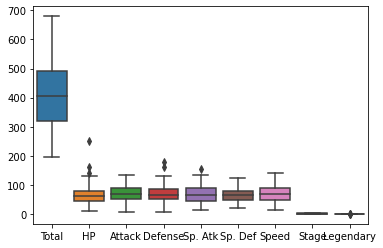

In [9]:
sns.boxplot(data=df)

<AxesSubplot:>

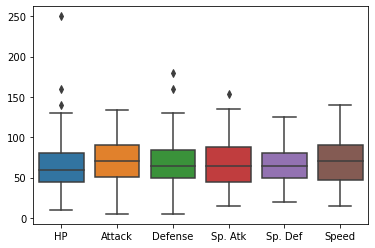

In [10]:
# Pre-format DataFrame
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
 
# New boxplot using stats_df
sns.boxplot(data=stats_df)


<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

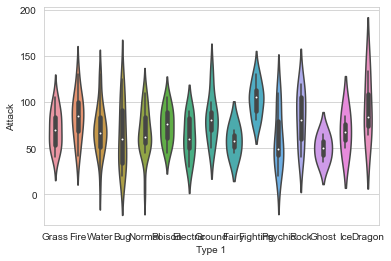

In [11]:
# Set theme
sns.set_style('whitegrid')
 
# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=df)

In [12]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

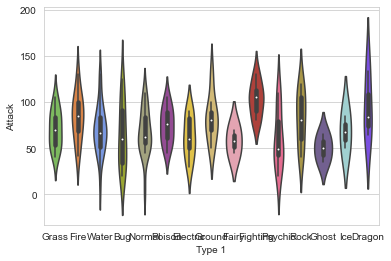

In [13]:
# Violin plot with Pokemon color palette
sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors) # Set color palette

/Users/kaaneyvaz/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 10.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

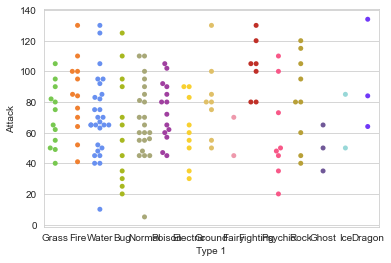

In [14]:
# Swarm plot with Pokemon color palette
sns.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)

Text(0.5, 1.0, 'Attack by Type')

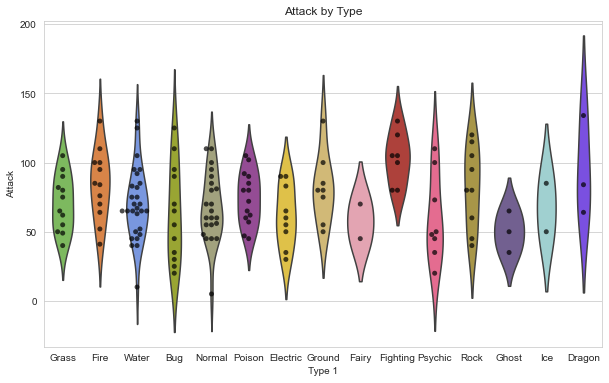

In [15]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

In [18]:
# Melt DataFrame
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


In [19]:
print( stats_df.shape )
print( melted_df.shape )
# (151, 9)
# (906, 5)

(151, 9)
(906, 5)


<AxesSubplot:xlabel='Stat', ylabel='value'>

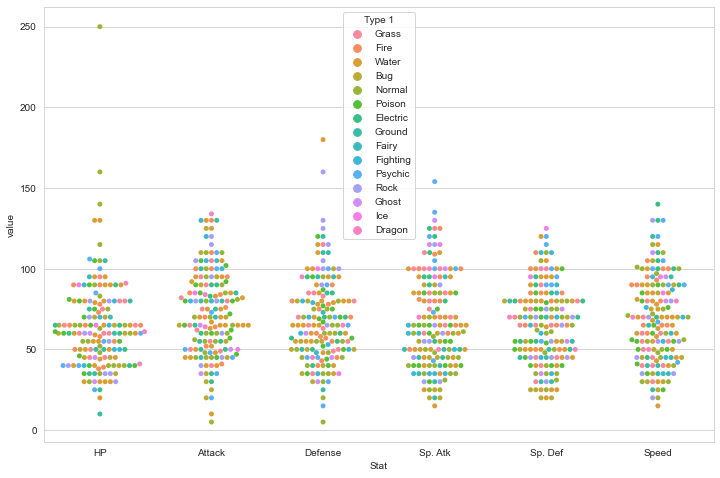

In [23]:
plt.figure(figsize=(12,8))
# Swarmplot with melted_df
sns.swarmplot(x='Stat', y='value', data=melted_df, 
              hue='Type 1')

/Users/kaaneyvaz/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:2999: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
/Users/kaaneyvaz/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 41.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kaaneyvaz/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kaaneyvaz/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kaaneyvaz/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWa

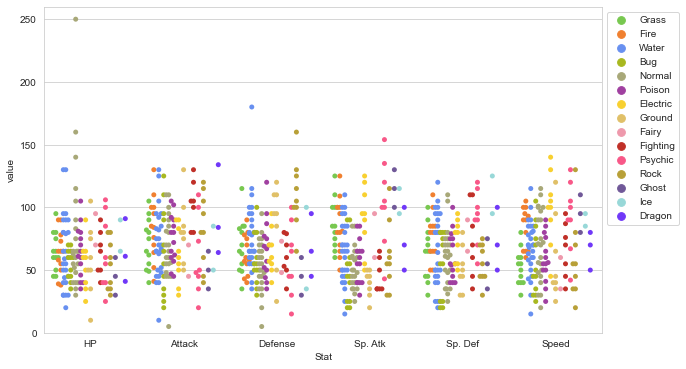

In [25]:
# 1. Enlarge the plot
plt.figure(figsize=(10,6))
 
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              split=True, # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette
 
# 4. Adjust the y-axis
plt.ylim(0, 260)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

<AxesSubplot:>

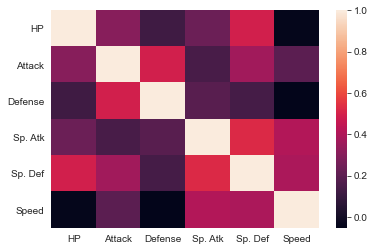

In [26]:
# Calculate correlations
corr = stats_df.corr()
 
# Heatmap
sns.heatmap(corr)

/Users/kaaneyvaz/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Attack', ylabel='Density'>

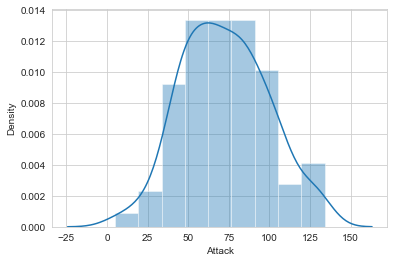

In [27]:
# Distribution Plot (a.k.a. Histogram)
sns.distplot(df.Attack)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Grass'),
  Text(1, 0, 'Fire'),
  Text(2, 0, 'Water'),
  Text(3, 0, 'Bug'),
  Text(4, 0, 'Normal'),
  Text(5, 0, 'Poison'),
  Text(6, 0, 'Electric'),
  Text(7, 0, 'Ground'),
  Text(8, 0, 'Fairy'),
  Text(9, 0, 'Fighting'),
  Text(10, 0, 'Psychic'),
  Text(11, 0, 'Rock'),
  Text(12, 0, 'Ghost'),
  Text(13, 0, 'Ice'),
  Text(14, 0, 'Dragon')])

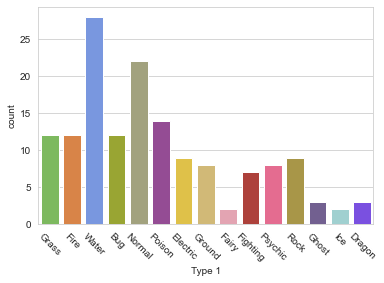

In [29]:
# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
 
# Rotate x-labels
plt.xticks(rotation=-45)

/Users/kaaneyvaz/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


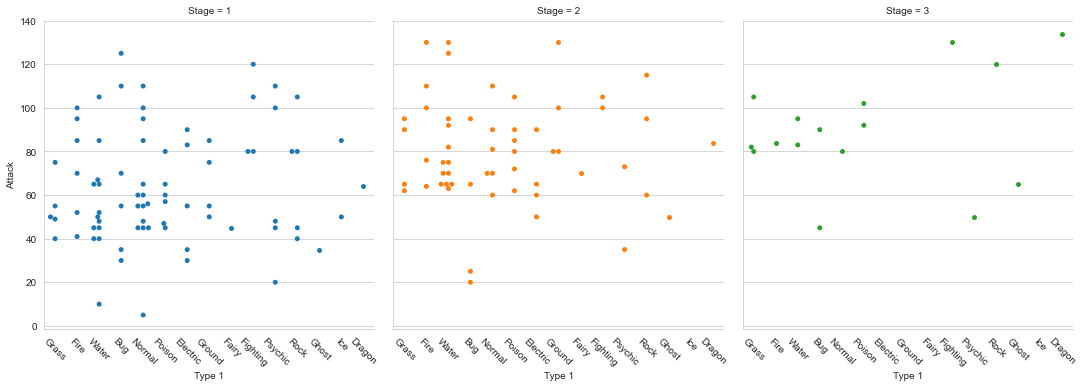

In [31]:
# Factor Plot
g = sns.factorplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)
 
# Doesn't work because only rotates last plot
# plt.xticks(rotation=-45)

/Users/kaaneyvaz/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attack', ylabel='Defense'>

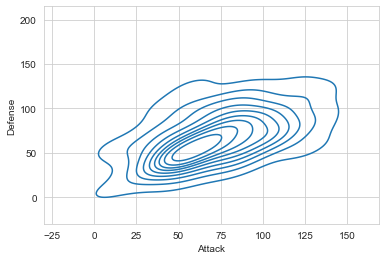

In [32]:
# Density Plot
sns.kdeplot(df.Attack, df.Defense)

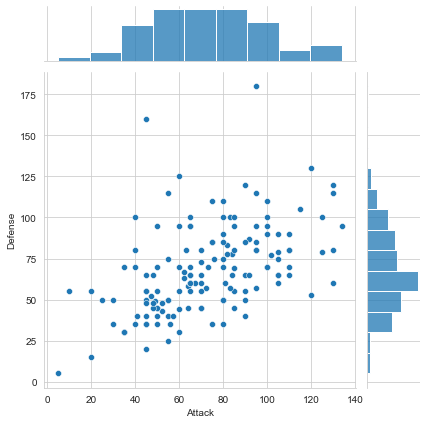

In [33]:
# Joint Distribution Plot
sns.jointplot(x='Attack', y='Defense', data=df)

## Plot Size and Title

One thing you may want to do is to change the plot size which by default can be a bit small.  You should also add titles to your plots and make sure they have good X and Y axis labels.  Here's an example of how you can do this.  Play around with these settings to see their effect.  (Note that I get a warning about deprecated arguements when running this, that's ok).

You might also want to experiment with different figure styles to find something you like.  Here is the [Seaborn documentation](https://seaborn.pydata.org/archive/0.10/tutorial/aesthetics.html#seaborn-figure-styles) on that for version 0.10.

/Users/kaaneyvaz/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Speed for Pokemon')

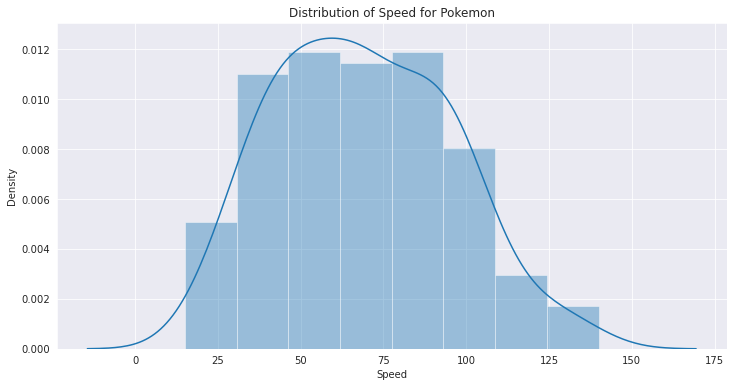

In [5]:
plt.figure(figsize=(12,6))
with sns.axes_style('darkgrid'):
    sns.distplot(df.Speed)
plt.title("Distribution of Speed for Pokemon")